Import the following functions:

1. Numpy
2. Scipy.stats: provides probability and statistical functions
3. Seaborn: neat visualization library for data

In [27]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Create a simple logistic data

In [28]:
rng = np.random.RandomState(0)
n_samples = 100
x = 2*(rng.rand(n_samples)-0.5)
print(x)
theta_true = 5 # this is the true parameter; assume that we know this for now

[ 0.09762701  0.43037873  0.20552675  0.08976637 -0.1526904   0.29178823
 -0.12482558  0.783546    0.92732552 -0.23311696  0.58345008  0.05778984
  0.13608912  0.85119328 -0.85792788 -0.8257414  -0.95956321  0.66523969
  0.5563135   0.7400243   0.95723668  0.59831713 -0.07704128  0.56105835
 -0.76345115  0.27984204 -0.71329343  0.88933783  0.04369664 -0.17067612
 -0.47088878  0.54846738 -0.08769934  0.1368679  -0.9624204   0.23527099
  0.22419145  0.23386799  0.88749616  0.3636406  -0.2809842  -0.12593609
  0.39526239 -0.87954906  0.33353343  0.34127574 -0.57923488 -0.7421474
 -0.3691433  -0.27257846  0.14039354 -0.12279697  0.97674768 -0.79591038
 -0.58224649 -0.67738096  0.30621665 -0.49341679 -0.06737845 -0.51114882
 -0.68206083 -0.77924972  0.31265918 -0.7236341  -0.60683528 -0.26254966
  0.64198646 -0.80579745  0.67588981 -0.80780318  0.95291893 -0.0626976
  0.95352218  0.20969104  0.47852716 -0.92162442 -0.43438607 -0.75960688
 -0.4077196  -0.76254456 -0.36403364 -0.17147401 -0.8

Very simplified logistic regression model with only 1 parameter:

- $\sigma(a)$ = $\frac{1}{1 + e^{-a}}$

where $a$ is $\theta^{T}x = [\theta_1, \theta_2, ...][x_1, x_2, ...]^{T}$ 

In [6]:
def model(x, theta):
  return 1 / (1 + np.exp(-x.dot(theta)))

So, the code below computes $y$, which generates a random number array of size $x.shape$ and compares them with the $\sigma(a)$. If the randomly generated numbers are above the $\sigma(a) value, then they are equal to True

[0.619667   0.8958456  0.73645689 0.61036146 0.31789727 0.81137067
 0.34884321 0.98050156 0.99040268 0.23765398 0.94869263 0.57173886
 0.66383815 0.98601886 0.01352445 0.01584847 0.00818027 0.96531672
 0.9416716  0.97587584 0.99172481 0.95219254 0.4048718  0.94296111
 0.02151499 0.80205853 0.02747907 0.98841841 0.55440456 0.29872418
 0.0867132  0.9394791  0.39209924 0.66470654 0.00806517 0.76429178
 0.75416623 0.76302569 0.98831252 0.86035036 0.19703639 0.347583
 0.87828747 0.01215548 0.84126454 0.84636599 0.052343   0.02387551
 0.13637661 0.20377063 0.66862389 0.35115073 0.99248819 0.01835096
 0.05160109 0.03270724 0.82216475 0.07819817 0.41656458 0.07204154
 0.03197498 0.01991339 0.82682578 0.02613059 0.04590556 0.21202732
 0.96120634 0.01748131 0.96705606 0.01730989 0.99154574 0.42226359
 0.99157099 0.74047814 0.91626402 0.00987209 0.10229962 0.02192338
 0.11520957 0.02161062 0.13941369 0.29788911 0.01263555 0.87266398
 0.66061017 0.08737586 0.55785977 0.01694662 0.68123756 0.986519

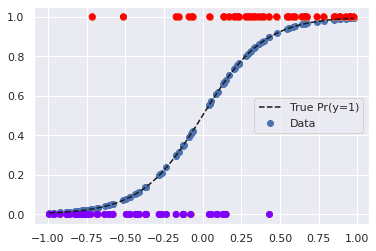

In [29]:
y_rand = rng.rand(*x.shape)
y = (y_rand <= model(x, theta_true).astype(float))
print(model(x,theta_true))
plt.scatter(x,model(x,theta_true))
plt.scatter(x,y)
print(y)
print(y_rand)

# Plot Data
xq = np.linspace(np.min(x), np.max(x))
plt.plot(xq, model(xq, theta_true), '--k', label='True Pr(y=1)')
plt.scatter(x, y, c=y, cmap='rainbow', label='Data')
plt.legend()

Define the logistic regression objective function. We know the true parameter is 5, but let's graph it here for various values of the parameter.

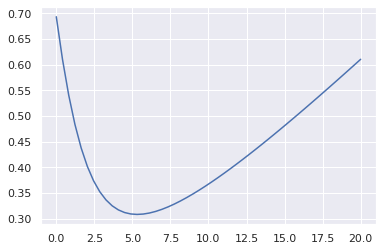

In [31]:
def objective(x, y, theta):
  prob = model(x, theta)
  return -np.mean(y * np.log(prob) + (1-y) * np.log(1 - prob))

theta_arr = np.linspace(0,20)
obj_arr = [objective(x, y, theta) for theta in theta_arr]
plt.plot(theta_arr, obj_arr)

Explicitly compute (by hand) the gradient of the function

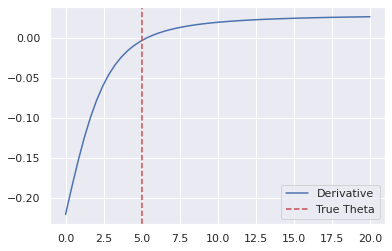

In [32]:
def grad_objective(x, y, theta):
  #See https://web.stanford.edu/~jurafsky/slp3/5.pdf section 5.8 for derivation
  return np.mean((model(x, theta) - y) * x)

grad_arr = [grad_objective(x, y, theta) for theta in theta_arr]
plt.plot(theta_arr, grad_arr, label='Derivative')
plt.axvline(5, linestyle='--', color='r', label='True Theta')
plt.legend()

(Stochastic) Gradient Descent with various step sizes

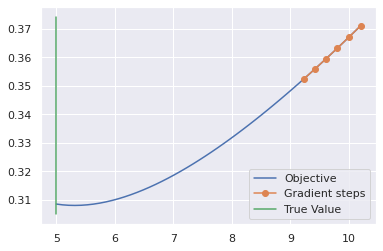

In [37]:
# Gradient descent parameters
max_iter = 5
step_size = 10     # 10, 100, 300
sgd = False
if sgd: max_iter *= 5      # Increase number of iterations for SGD
rng = np.random.RandomState(0)

# Initialization
theta_hat = 10.2    # an arbitrary starting value
theta_hat_arr = [theta_hat]
obj_hat_arr = [objective(x, y, theta_hat)]

# Gradient descent iterations
for it in range(max_iter):
  if sgd:
    # Select random data point
    rand_idx = rng.randint(len(y))
    xg, yg = x[rand_idx:rand_idx+1], y[rand_idx:rand_idx+1]
  else:
    # Use all data points in gradient calculation
    xg, yg = x, y
  grad = grad_objective(xg, yg, theta_hat)
  theta_hat = theta_hat - step_size * grad

  # Save estimates for visualization
  theta_hat_arr.append(theta_hat)
  obj_hat_arr.append(objective(x, y, theta_hat))

vis_arr = np.linspace(np.minimum(np.min(theta_hat_arr), theta_true), np.maximum(np.max(theta_hat_arr), theta_true))
plt.plot(vis_arr, [objective(x, y, theta) for theta in vis_arr], label='Objective')
plt.plot(theta_hat_arr, obj_hat_arr, 'o-', label='Gradient steps')
plt.plot(np.ones(2)*theta_true, plt.ylim(), label='True Value')
plt.legend()